In [1]:
import requests
import pandas as pd

# Number of cells per organism part

## Define the query

With this query we obtain the total number of cells (measured in thousands of cells) of each organism part in which the specimen studied is an adult human.

In [2]:
query = '''
PREFIX a: <http://www.semanticweb.org/alicia/ontologies/2020/8/singleCellRepositories#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
SELECT 
    ?organismPart 
    (IF(SUM(?numCells) = 0, "unspecified", SUM(?numCells) / 1000) AS ?numTotalCells) 
    (COUNT(DISTINCT ?projectTitle) AS ?numProjects)
    (COUNT(?id) AS ?numSpecimens)
    (SUM(IF(?repository = "HumanCellAtlas", 1, 0)) AS ?HCASpecimens)
    (SUM(IF(?repository = "SingleCellExpresionAtlas", 1, 0)) AS ?SCEASpecimens)
WHERE
{
    ?id rdf:type a:Specimen ;
        a:SPR.hasSpecie a:HomoSapiens ;
        a:SPR.hasMinAge ?minAge ;
        a:SPR.hasOrganismPart ?organismPart ;
        a:SPR.hasProjectTitle ?projectTitle ;
        a:SPR.isPartOfRepository ?repository ;
        a:SPR.hasTotalCellCount ?numCells .
    FILTER (?numCells != -1) .
    FILTER (?minAge > 17) .
}
GROUP BY ?organismPart
ORDER BY ?organismPart
'''

## Getting the data

With the server name and the service name, we can obtain the url in which we will request the data.

In [3]:
server_name = 'http://localhost:3030'
service_name = 'ds'
request_url = server_name + '/' + service_name

Once we have the query and the url, we can get the data that satisfies the query.

In [4]:
response = requests.post(request_url,
       data={'query': query})

headers = response.json()["head"]["vars"]
results = response.json()["results"]

rows = []

for result in response.json()["results"]["bindings"]:
    result_dict = {}
    for header in headers:
        result_dict[header] = result[header]['value']
        
    rows.append(result_dict)

df = pd.DataFrame(rows)
df

,organismPart,numTotalCells,numProjects,numSpecimens,HCASpecimens,SCEASpecimens
0,http://www.semanticweb.org/alicia/ontologies/2...,3.48,1,3,0,3
1,http://www.semanticweb.org/alicia/ontologies/2...,0.192,1,1,0,1
2,http://www.semanticweb.org/alicia/ontologies/2...,163.197,8,84,28,56
3,http://www.semanticweb.org/alicia/ontologies/2...,2.807,2,33,0,33
4,http://www.semanticweb.org/alicia/ontologies/2...,4.26,2,9,0,9
5,http://www.semanticweb.org/alicia/ontologies/2...,1.734,2,9,0,9
6,http://www.semanticweb.org/alicia/ontologies/2...,9.982,1,3,0,3
7,http://www.semanticweb.org/alicia/ontologies/2...,38.807,3,24,13,11
8,http://www.semanticweb.org/alicia/ontologies/2...,3.191,3,10,0,10
9,http://www.semanticweb.org/alicia/ontologies/2...,7.526,1,1,0,1


## Data procesing

We have to apply to the obtained data a cleansing process. In this process we will fix the type of the data and change the uri of the organism part by their identifying name. Also, we will sort the organism parts by the number of cells.

In [5]:
df["numTotalCells"] = pd.to_numeric(df["numTotalCells"])
df["numProjects"] = pd.to_numeric(df["numProjects"])
df["numSpecimens"] = pd.to_numeric(df["numSpecimens"])
df["HCASpecimens"] = pd.to_numeric(df["HCASpecimens"])
df["SCEASpecimens"] = pd.to_numeric(df["SCEASpecimens"])

df['organismPart'] = df['organismPart'].apply(lambda x: x.split('#')[1])
df = df.sort_values(by=['numTotalCells'], ascending=False)
df

,organismPart,numTotalCells,numProjects,numSpecimens,HCASpecimens,SCEASpecimens
12,HematopoieticSystem,1489.500,2,15,15,0
11,Eye,274.800,2,10,10,0
14,ImmuneSystem,274.182,1,63,63,0
2,Blood,163.197,8,84,28,56
18,Lung,150.921,4,54,24,30
10,Esophagus,93.267,1,23,23,0
21,Neoplasm,83.403,1,26,0,26
31,Skin,80.856,4,26,12,14
32,Spleen,66.553,1,20,20,0
33,Testes,38.992,2,6,0,6


## Data visualization

Now that we have the data in the correct format, we can visualize it.

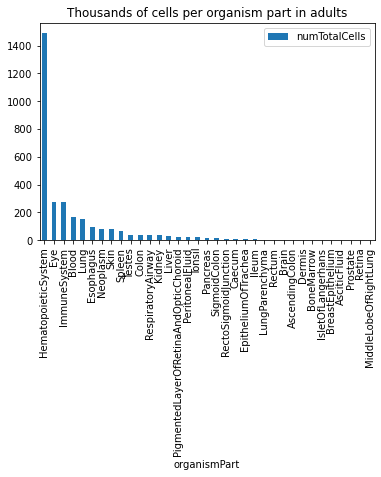

In [6]:
df.plot(
    x='organismPart', 
    y='numTotalCells', 
    kind='bar', 
    title='Thousands of cells per organism part in adults'
)

# Number of cells per cell type

## Define the query

With this query we obtain the total number of cells (measured in thousands of cells) of each cell type in which the specimen studied is an adult human.

In [7]:
query = '''
PREFIX a: <http://www.semanticweb.org/alicia/ontologies/2020/8/singleCellRepositories#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
SELECT 
    ?cellType 
    (IF(SUM(?numCells) = 0, "unspecified", SUM(?numCells) / 1000) AS ?numTotalCells) 
    (COUNT(DISTINCT ?projectTitle) AS ?numProjects)
    (COUNT(?id) AS ?numSpecimens)
    (SUM(IF(?repository = "HumanCellAtlas", 1, 0)) AS ?HCASpecimens)
    (SUM(IF(?repository = "SingleCellExpresionAtlas", 1, 0)) AS ?SCEASpecimens)
WHERE
{
    ?id rdf:type a:Specimen ;
        a:SPR.hasSpecie a:HomoSapiens ;
        a:SPR.hasMinAge ?minAge ;
        a:SPR.hasCellType ?cellType ;
        a:SPR.hasProjectTitle ?projectTitle ;
        a:SPR.isPartOfRepository ?repository ;
        a:SPR.hasTotalCellCount ?numCells .
    FILTER (?numCells != -1) .
    FILTER (?minAge > 17) .
}
GROUP BY ?cellType
ORDER BY ?cellType
'''

In [17]:
query = '''
PREFIX a: <http://www.semanticweb.org/alicia/ontologies/2020/8/singleCellRepositories#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
SELECT ?cellType (IF(SUM(?numCells) = 0, "unspecified", SUM(?numCells) / 1000) AS ?numTotalCells) (COUNT(DISTINCT ?projectTitle) AS ?numProjects)
WHERE
{
    ?id rdf:type a:Specimen ;
        a:SPR.hasSpecie a:HomoSapiens ;
        a:SPR.hasMinAge ?minAge ;
        a:SPR.hasCellType ?cellType ;
        a:SPR.hasProjectTitle ?projectTitle ;
        a:SPR.hasTotalCellCount ?numCells .
    FILTER (?numCells != -1) .
    FILTER (?minAge > 17) .
}
GROUP BY ?cellType
ORDER BY ?cellType
'''

## Getting the data

Once we have the query and the url, we can get the data that satisfies the query.

In [8]:
response = requests.post(request_url,
       data={'query': query})

headers = response.json()["head"]["vars"]
results = response.json()["results"]

rows = []

for result in response.json()["results"]["bindings"]:
    result_dict = {}
    for header in headers:
        result_dict[header] = result[header]['value']
        
    rows.append(result_dict)

df = pd.DataFrame(rows)
df

,cellType,numTotalCells,numProjects,numSpecimens,HCASpecimens,SCEASpecimens
0,http://www.semanticweb.org/alicia/ontologies/2...,0.84,1,7,0,7
1,http://www.semanticweb.org/alicia/ontologies/2...,274.182,1,63,63,0
2,http://www.semanticweb.org/alicia/ontologies/2...,1480.0,1,3,3,0
3,http://www.semanticweb.org/alicia/ontologies/2...,0.777,4,12,7,5
4,http://www.semanticweb.org/alicia/ontologies/2...,0.554,1,6,0,6
5,http://www.semanticweb.org/alicia/ontologies/2...,1.868,1,21,21,0
6,http://www.semanticweb.org/alicia/ontologies/2...,111.638,3,24,7,17
7,http://www.semanticweb.org/alicia/ontologies/2...,34.144,3,8,7,1
8,http://www.semanticweb.org/alicia/ontologies/2...,93.267,1,23,23,0
9,http://www.semanticweb.org/alicia/ontologies/2...,20.321,1,4,0,4


## Data procesing

We have to apply to the obtained data a cleansing process. In this process we will fix the type of the data and change the uri of the cell type by their identifying name. Also, we will sort the cell types by the number of cells.

In [9]:
df["numTotalCells"] = pd.to_numeric(df["numTotalCells"])
df["numProjects"] = pd.to_numeric(df["numProjects"])
df['cellType'] = df['cellType'].apply(lambda x: x.split('#')[1])
df = df.sort_values(by=['numTotalCells'], ascending=False)
df

,cellType,numTotalCells,numProjects,numSpecimens,HCASpecimens,SCEASpecimens
2,CD34+CD38-HematopoieticStemCell,1480.000,1,3,3,0
1,BoneMarrowHematopoieticCell,274.182,1,63,63,0
33,PeripheralBloodMononuclearCell,170.473,2,32,0,32
19,Leukocyte,164.277,1,63,0,63
6,EndothelialCell,111.638,3,24,7,17
30,Neuron,102.500,1,3,3,0
8,EpithelialCellOfEsophagus,93.267,1,23,23,0
29,NeuralCell,79.664,1,12,12,0
37,Splenocyte,66.553,1,20,20,0
10,Fibroblast,54.321,3,11,7,4


## Data visualization

Now that we have the data in the correct format, we can visualize it.

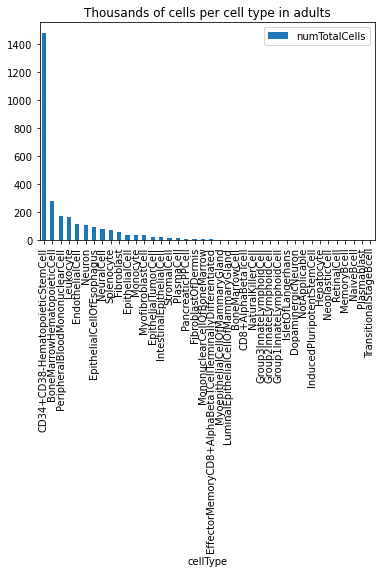

In [10]:
df.plot(
    x='cellType', 
    y='numTotalCells', 
    kind='bar', 
    title='Thousands of cells per cell type in adults'
)